In [5]:
import networkx as nx
from pathlib import Path
import random
from networkx.algorithms.flow import preflow_push
import time
from algo.fifo_push_relabel import fifo_push_relabel_impl
import matplotlib.pyplot as plt
import statistics

def get_input(file):
    p = file.readline()
    while p:
        params = tuple(map(int, p.split()))
        yield params
        p = file.readline()


In [2]:
INPUT_PARAMS_PATH = Path("./datasets/analyze/input_params.txt")
exec_time = []
with INPUT_PARAMS_PATH.open('r') as file:
    for params in get_input(file):
        g = nx.gnm_random_graph(params[0], params[1])
        for edge in g.edges():
            cap = random.randint(1, params[2])
            g[edge[0]][edge[1]]['capacity'] = cap
        r = preflow_push(nx.Graph(g), 0, params[0]-1, value_only=True)
        expected_result = r.graph["flow_value"]
        gr = nx.Graph(g)
        start_time=time.perf_counter()
        result = fifo_push_relabel_impl(gr,0,params[0]-1)
        finish_time=time.perf_counter()
        exec_time.append(finish_time-start_time)
        assert expected_result == result

In [6]:
max_time = [max(exec_time[i*50:(i+1)*50]) for i in range(5)]
avg_time = [statistics.mean(exec_time[i*50:(i+1)*50]) for i in range(5)]

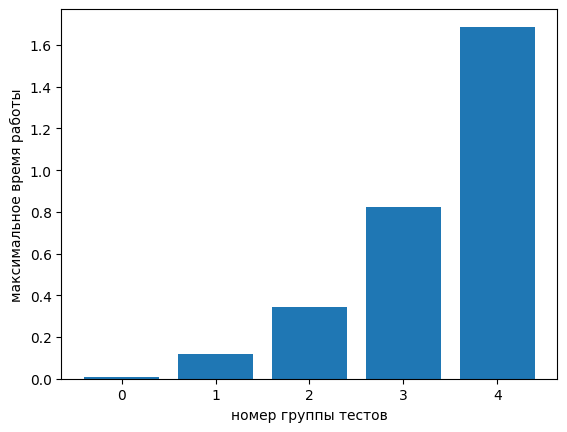

In [12]:
groups = list(range(5))
plt.bar(groups, max_time)
plt.xlabel('номер группы тестов')
plt.ylabel('максимальное время работы')
plt.show()

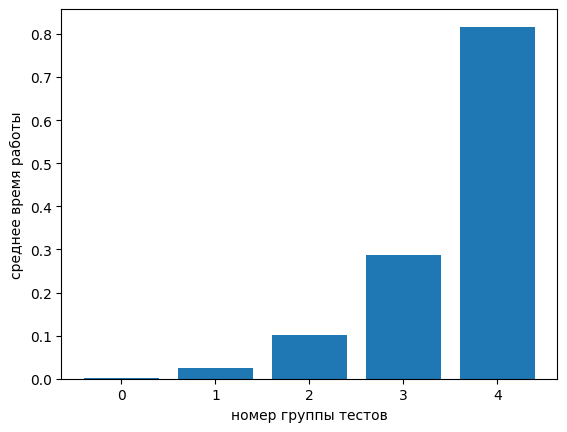

In [13]:
groups = list(range(5))
plt.bar(groups, avg_time)
plt.xlabel('номер группы тестов')
plt.ylabel('среднее время работы')
plt.show()